<a href="https://colab.research.google.com/github/youngggseo/oliveyoung-recommendation-system/blob/main/%EC%9D%B4%EC%BB%A4%EB%A8%B8%EC%8A%A4_%EC%B6%94%EC%B2%9C%EC%8B%9C%EC%8A%A4%ED%85%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 조원


허서영 01058504652 dododj301@gmail.com

고민수 01039417045 alstn123120@gmail.com

백은혜 01077453871 bihunheay1@gmail.com

이도형 01075781789 dotory8625@gmail.com

## 설치

In [ ]:
!pip install selenium
!apt-get update

# (최초 1회)
!apt install chromium-chromedriver
!cp /usr/lib/chromium-browser/chromedriver '/content/drive/MyDrive/Colab Notebooks' #
!pip install chromedriver-autoinstaller

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.4/9.4 MB 28.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 476.0/476.0 kB 13.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 1.4 MB/s eta 0:00:00
Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Get:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Hit:3 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:4 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Ign:5 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Get:6 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:7 https://r2u.stat.illinois.edu/ubuntu jammy Release [5,713 B]
Get:8 https://r2u.stat.illinois.edu/ubuntu jammy Release.gpg [793 B]
Get:9 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [945 kB]
Get:10 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Get:11

In [ ]:
!python --version

import selenium
print(selenium.__version__)

Python 3.10.12
4.31.1


In [ ]:
from selenium import webdriver
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.by import By
import sys
from selenium.webdriver.common.keys import Keys
import urllib.request
import os
from urllib.request import urlretrieve

import time
import pandas as pd
import numpy as np
import chromedriver_autoinstaller  # setup chrome options

In [ ]:
chrome_path = "/content/drive/MyDrive/Colab Notebooks/chromedriver"

sys.path.insert(0,chrome_path)
chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--headless') # ensure GUI is off
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')  # set path to chromedriver as per your configuration
chrome_options.add_argument('lang=ko_KR') # 한국어
chrome_options.add_argument('user-agent=Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36')

chromedriver_autoinstaller.install()  # set the target URL

# 1. 데이터 크롤링

In [ ]:
chrome_path = "/content/drive/MyDrive/Colab Notebooks/chromedriver"

sys.path.insert(0,chrome_path)
chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--headless') # ensure GUI is off
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')  # set path to chromedriver as per your configuration
chrome_options.add_argument('lang=ko_KR') # 한국어

chromedriver_autoinstaller.install()  # set the target URL

In [ ]:
driver = webdriver.Chrome(options=chrome_options)

## 링크 크롤링

크롤링 해야하는 링크를 수집하는 코드를 작성합니다.

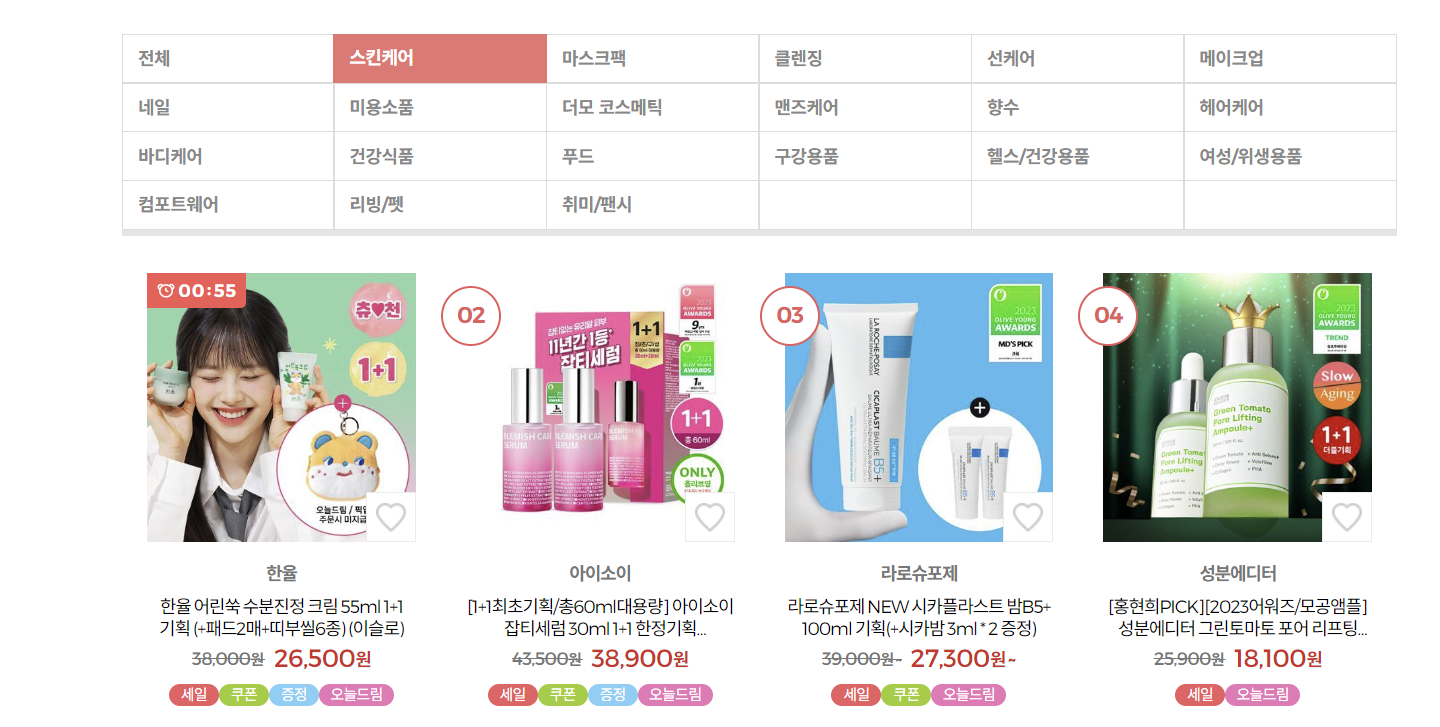

In [ ]:
from selenium import webdriver
from selenium.webdriver.common.by import By

# 웹드라이버 초기화 (크롬 드라이버 경로 설정 필요)
driver = webdriver.Chrome(options=chrome_options)

# 웹 페이지로 이동
driver.get('https://www.oliveyoung.co.kr/store/main/getBestList.do?dispCatNo=900000100100001&fltDispCatNo=10000010001&pageIdx=1&rowsPerPage=8&t_page=%EB%9E%AD%ED%82%B9&t_click=%ED%8C%90%EB%A7%A4%EB%9E%AD%ED%82%B9_%EC%8A%A4%ED%82%A8%EC%BC%80%EC%96%B4')  # 실제 URL로 대체

# URL을 저장할 리스트
url_list = []

# 모든 ul 태그를 한 번에 가져오기 (상위 4개와 그 외 모두 포함)
ul_elements = driver.find_elements(By.CSS_SELECTOR, 'ul.cate_prd_list, ul.cate_prd_list.mgLine')

# 각 ul 태그를 순회하며 li 태그 내의 a 태그의 href 속성 추출
for ul in ul_elements:
    li_elements = ul.find_elements(By.TAG_NAME, 'li')
    for li in li_elements:
        a_tag = li.find_element(By.TAG_NAME, 'a')
        url = a_tag.get_attribute('href')
        if url not in url_list:  # 중복 방지
            url_list.append(url)

# 결과 출력
print(url_list)

# 브라우저 닫기
driver.quit()

['https://www.oliveyoung.co.kr/store/goods/getGoodsDetail.do?goodsNo=A000000210661&dispCatNo=90000010009&trackingCd=Best_Sellingbest&t_page=%EB%9E%AD%ED%82%B9&t_click=%ED%8C%90%EB%A7%A4%EB%9E%AD%ED%82%B9_%EC%8A%A4%ED%82%A8%EC%BC%80%EC%96%B4_%EC%83%81%ED%92%88%EC%83%81%EC%84%B8&t_number=1', 'https://www.oliveyoung.co.kr/store/goods/getGoodsDetail.do?goodsNo=A000000208020&dispCatNo=90000010009&trackingCd=Best_Sellingbest&t_page=%EB%9E%AD%ED%82%B9&t_click=%ED%8C%90%EB%A7%A4%EB%9E%AD%ED%82%B9_%EC%8A%A4%ED%82%A8%EC%BC%80%EC%96%B4_%EC%83%81%ED%92%88%EC%83%81%EC%84%B8&t_number=2', 'https://www.oliveyoung.co.kr/store/goods/getGoodsDetail.do?goodsNo=A000000162035&dispCatNo=90000010009&trackingCd=Best_Sellingbest&t_page=%EB%9E%AD%ED%82%B9&t_click=%ED%8C%90%EB%A7%A4%EB%9E%AD%ED%82%B9_%EC%8A%A4%ED%82%A8%EC%BC%80%EC%96%B4_%EC%83%81%ED%92%88%EC%83%81%EC%84%B8&t_number=3', 'https://www.oliveyoung.co.kr/store/goods/getGoodsDetail.do?goodsNo=A000000189261&dispCatNo=90000010009&trackingCd=Best_Sellingbe

In [ ]:
print(f"크롤링한 링크의 개수: {len(url_list)}")

크롤링한 링크의 개수: 100


## 상품 정보 크롤링

각 상품 별 정보를 크롤링하는 코드를 작성합니다.

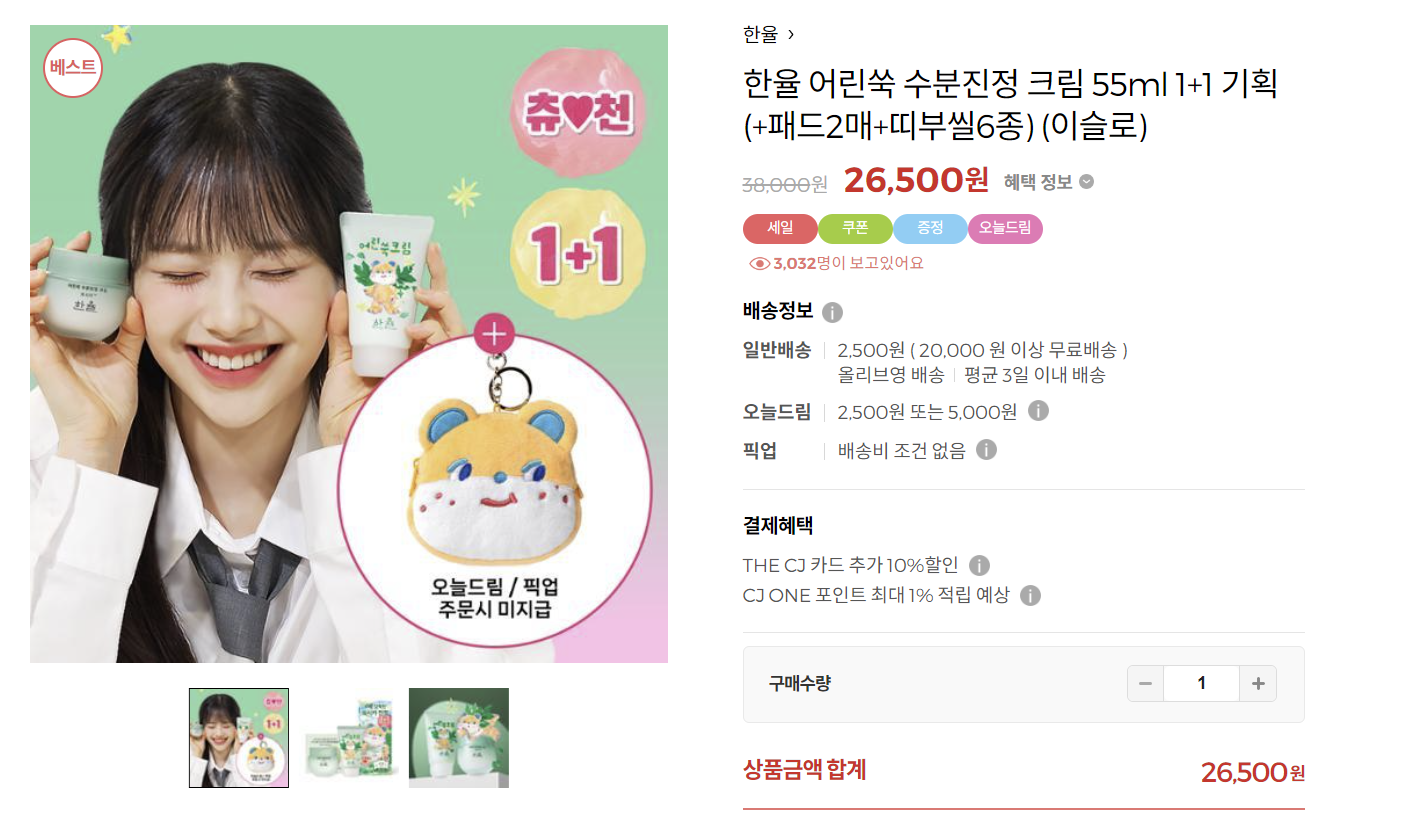

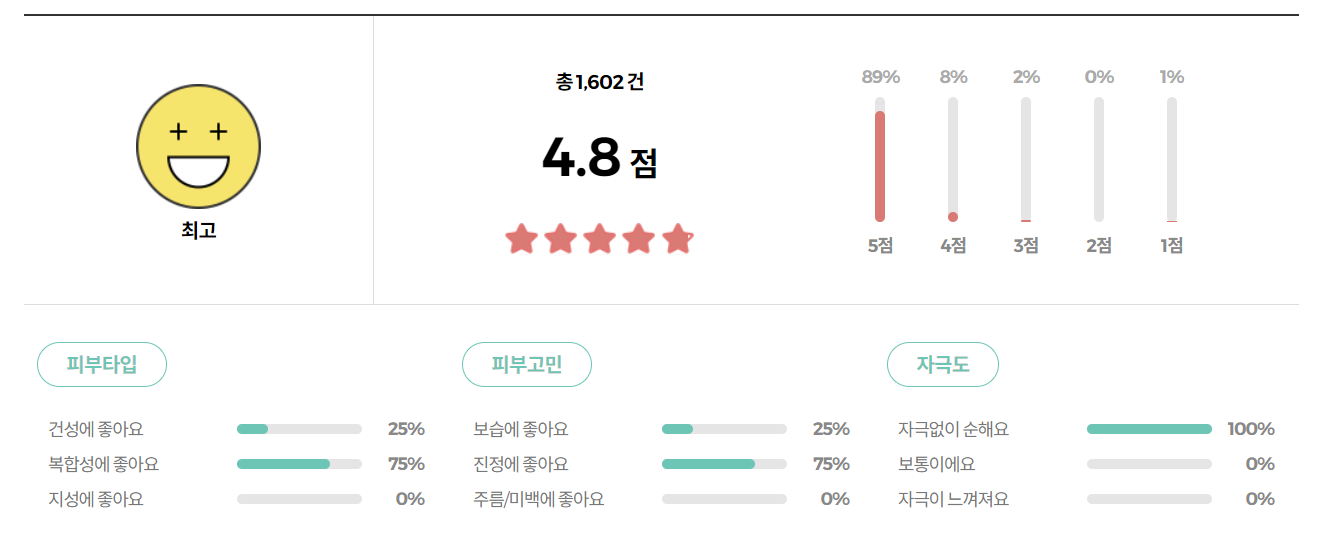

In [ ]:
#  NoSuchElementException 임포트 추가
from selenium.common.exceptions import NoSuchElementException
# 대기 시간 설정, 예외 처리를 위한 TimeoutException
from selenium.common.exceptions import TimeoutException, NoSuchElementException
## 정규표현식 모듈
import re

In [ ]:
def convert_review_grade(grade):
    if grade == "최고":
        return 5
    elif grade == "좋음":
        return 4
    elif grade == "보통":
        return 3
    elif grade == "별로":
        return 2
    elif grade == "나쁨":
        return 1
    else:
        return None

def clean_final_price(price):
    cleaned_price = re.sub(r'[~\s]', '', price)
    return cleaned_price

def scrape_product_info(url):
    driver = webdriver.Chrome(options=chrome_options)
    driver.get(url) #url열기

    # 리뷰 버튼 클릭
    button = driver.find_element(By.XPATH, '//*[@id="reviewInfo"]/a')
    button.click()

    # 브랜드 정보
    try:
        brand_name = driver.find_element(By.CLASS_NAME, 'prd_brand').text
    except:
        brand_name = None

    # 제품명
    try:
        product_name = driver.find_element(By.CLASS_NAME, 'prd_name').text
    except:
        product_name = None

    ## 가격 정보

    # 원래 가격
    try:
        original_price = driver.find_element(By.CLASS_NAME, 'price-1').text.replace(',', '').replace('\n원', '원')
    except:
        original_price = None

    # 최종 가격
    try:
        final_price = driver.find_element(By.CLASS_NAME, 'price-2').text.replace(',', '').replace('\n원', '원')
    except:
        final_price = None

    # 최종 가격을 정리하는 부분
    final_price = clean_final_price(final_price)

    ## 리뷰 정보

    # 리뷰 수
    try:
        review_count = WebDriverWait(driver, 10).until(
        EC.presence_of_element_located((By.CSS_SELECTOR, '#gdasContentsArea > div > div.product_rating_area.review-write-delete > div > div.star_area > p.total > em'))).text.replace(',', '')
    except NoSuchElementException:
        review_count = None

    # 리뷰 등급
    try:
        # 리뷰 등급 요소 찾기
        review_grade = WebDriverWait(driver, 10).until(
        EC.presence_of_element_located((By.CSS_SELECTOR, "#gdasContentsArea > div > div.product_rating_area.review-write-delete > div > div.grade_img > p > em")))
        # 리뷰 등급 텍스트 가져오기
        review_grade_text = review_grade.text
        # 리뷰 등급 텍스트를 숫자로 변환
        review_grade = convert_review_grade(review_grade_text)
    except NoSuchElementException:
        review_grade = None

    # 리뷰 점수별 퍼센트 크롤링
    ratings = {}
    WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.CSS_SELECTOR, 'ul.graph_list')))
    rating_elements = driver.find_elements(By.CSS_SELECTOR, 'ul.graph_list li')
    for element in rating_elements:
        score = element.find_element(By.CSS_SELECTOR, '.txt').text
        percent = element.find_element(By.CSS_SELECTOR, '.per').text
        ratings[score] = percent

    # 피부타입, 피부고민, 자극도 정보 크롤링
    skin_info = {
          "피부타입": {},
          "피부고민": {},
          "자극도" : {}
    }

    try:
        WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.CLASS_NAME, 'poll_all.clrfix')))
        skin_info_elements = driver.find_elements(By.CSS_SELECTOR, '.poll_all.clrfix')

        def extract_info(category_index):
            items = driver.find_elements(By.CSS_SELECTOR, f'dl.poll_type2.type3:nth-of-type({category_index}) ul.list li')
            return {item.find_element(By.CSS_SELECTOR, '.txt').text: item.find_element(By.CSS_SELECTOR, '.per').text for item in items}

        # 정보 추출
        skin_info = {
            "피부타입": extract_info(1),
            "피부고민": extract_info(2),
            "자극도": extract_info(3)
    }
    except Exception as e:
        skin_info = None  # poll_all.clrfix가 존재하지 않거나 다른 오류 발생 시 None으로 설정

    driver.quit() #드라이버 닫기

    # 데이터를 딕셔너리로 저장
    data = {
        "브랜드": [brand_name],
        "제품명": [product_name],
        "원래 가격": [original_price],
        "최종 가격": [final_price],
        "리뷰 수": [review_count],
        "리뷰 등급": [review_grade],
        "리뷰 점수별 퍼센트": [ratings],
        "리뷰 점수 항목별 퍼센트": [skin_info]
    }

    # 데이터프레임으로 만들기
    df = pd.DataFrame(data)

    return df

In [ ]:
product_info = scrape_product_info("https://www.oliveyoung.co.kr/store/goods/getGoodsDetail.do?goodsNo=A000000189261&dispCatNo=90000010009&trackingCd=Best_Sellingbest&t_page=%EB%9E%AD%ED%82%B9&t_click=%ED%8C%90%EB%A7%A4%EB%9E%AD%ED%82%B9_%EC%8A%A4%ED%82%A8%EC%BC%80%EC%96%B4_%EC%83%81%ED%92%88%EC%83%81%EC%84%B8&t_number=1")
#print(product_info)

# 첫 번째 행의 데이터를 딕셔너리로 변환
product_info_dic = product_info.iloc[0].to_dict()

# 데이터를 간단하게 출력
for key, value in product_info_dic.items():
    print(f"{key}: {value}")

브랜드: 토리든
제품명: [8월 올영픽/단독기획] 토리든 다이브인 저분자 히알루론산 세럼 50ml 리필기획(+리필팩 50ml)
원래 가격: 36000원
최종 가격: 23750원
리뷰 수: 33116
리뷰 등급: 5
리뷰 점수별 퍼센트: {'5점': '88%', '4점': '9%', '3점': '2%', '2점': '0%', '1점': '0%'}
리뷰 점수 항목별 퍼센트: {'피부타입': {'건성에 좋아요': '37%', '복합성에 좋아요': '52%', '지성에 좋아요': '11%'}, '피부고민': {'보습에 좋아요': '76%', '진정에 좋아요': '24%', '주름/미백에 좋아요': '1%'}, '자극도': {'자극없이 순해요': '82%', '보통이에요': '18%', '자극이 느껴져요': '1%'}}


## 리뷰 정보 크롤링

각 상품별 리뷰 정보를 크롤링하는 코드를 작성합니다.

In [ ]:
# 별점 추출 함수
def extract_star_rating(style_attr):
    try:
        # 'width: 60%;' 형태의 문자열에서 '60'을 추출
        width_value = style_attr.split('width:')[1].split('%')[0].strip()
        # 100%가 5점이므로, 백분율을 점수로 변환
        rating = (float(width_value) / 100) * 5
        return rating
    except (IndexError, ValueError) as e:
        # 오류 발생 시 NaN 반환
        return np.nan

In [ ]:
def collect_reviews(product_url):
    # 메인 데이터프레임 초기화
    reviews_df = pd.DataFrame(columns=['제품명', '리뷰어', '리뷰어 정보', '별점', '한달이상사용', '재구매여부', '피부타입', '피부고민', '자극도', '리뷰내용'])

    # 드라이버 초기화
    driver = webdriver.Chrome(options=chrome_options)

    # 상품 페이지로 이동
    driver.get(product_url)

    # 페이지 로딩 대기
    WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.XPATH, '//*[@id="reviewInfo"]/a')))

    # 상품명 크롤링 (PK)
    try:
        product_name_element = driver.find_element(By.CLASS_NAME, 'prd_name')
        product_name = product_name_element.text
    except NoSuchElementException:
        product_name = np.nan

    # 리뷰 버튼 클릭
    try:
        button = driver.find_element(By.XPATH, '//*[@id="reviewInfo"]/a')
        button.click()
    except NoSuchElementException:
        print("리뷰 버튼을 찾을 수 없습니다.")
        driver.quit()
        return reviews_df

    # 리뷰 섹션 로딩 대기
    review_section = WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.CLASS_NAME, 'review_cont')))
    driver.execute_script("arguments[0].scrollIntoView(true);", review_section)

    # 리뷰 요소들을 가져오기
    reviews = driver.find_elements(By.CSS_SELECTOR, '#gdasList div.review_cont')
    reviewers = driver.find_elements(By.CSS_SELECTOR, '#gdasList div.info')

    for review, reviewer in zip(reviews, reviewers):
        new_row = {}  # 각 리뷰의 데이터를 저장할 임시 딕셔너리

        # 제품명
        new_row['제품명'] = product_name

        # 리뷰어
        try:
            reviewer_name_element = reviewer.find_element(By.CLASS_NAME, 'id')
            new_row['리뷰어'] = reviewer_name_element.text if reviewer_name_element else np.nan
        except NoSuchElementException:
            new_row['리뷰어'] = np.nan

        # 리뷰어 정보
        try:
            reviewer_info_element = reviewer.find_element(By.CLASS_NAME, 'tag')
            new_row['리뷰어 정보'] = reviewer_info_element.text if reviewer_info_element else np.nan
        except NoSuchElementException:
            new_row['리뷰어 정보'] = np.nan

        # 별점
        try:
            star_rating_element = review.find_element(By.CLASS_NAME, 'point')
            style_value = star_rating_element.get_attribute('style')
            new_row['별점'] = extract_star_rating(style_value)
        except NoSuchElementException:
            new_row['별점'] = np.nan

        # 한달이상사용 및 재구매여부
        try:
            month_rebuy = [element.text for element in reviewer.find_elements(By.CLASS_NAME, 'point_flag')]
            new_row['한달이상사용'] = 1 if any('한달' in text for text in month_rebuy) else 0
            new_row['재구매여부'] = 1 if any('재구매' in text for text in month_rebuy) else 0
        except NoSuchElementException:
            new_row['한달이상사용'] = np.nan
            new_row['재구매여부'] = np.nan

        # 피부타입
        try:
            skin_type_element = review.find_element(By.XPATH, ".//dl[@class='poll_type1'][1]//dd//span[@class='txt']")
            new_row['피부타입'] = skin_type_element.text
        except NoSuchElementException:
            new_row['피부타입'] = np.nan

        # 피부고민
        try:
            skin_concern_element = review.find_element(By.XPATH, ".//dl[@class='poll_type1'][2]//dd//span[@class='txt']")
            new_row['피부고민'] = skin_concern_element.text
        except NoSuchElementException:
            new_row['피부고민'] = np.nan

        # 자극도
        try:
            irritation_element = review.find_element(By.CSS_SELECTOR, "dl.poll_type1:nth-of-type(3) dd span.txt")
            new_row['자극도'] = irritation_element.text
        except NoSuchElementException:
            new_row['자극도'] = np.nan

        # 리뷰 내용
        try:
            review_content = review.find_element(By.CLASS_NAME, 'txt_inner')
            new_row['리뷰내용'] = review_content.get_attribute('innerHTML').replace('<br>', '\n')
        except NoSuchElementException:
            new_row['리뷰내용'] = np.nan

        # 새로운 행을 DataFrame에 추가
        reviews_df = pd.concat([reviews_df, pd.DataFrame([new_row])], ignore_index=True)

    # 드라이버 종료
    driver.quit()

    return reviews_df


In [ ]:
review_info = collect_reviews("https://www.oliveyoung.co.kr/store/goods/getGoodsDetail.do?goodsNo=A000000200663&dispCatNo=90000010009&trackingCd=Best_Sellingbest&t_page=%EB%9E%AD%ED%82%B9&t_click=%ED%8C%90%EB%A7%A4%EB%9E%AD%ED%82%B9_%EC%8A%A4%ED%82%A8%EC%BC%80%EC%96%B4_%EC%83%81%ED%92%88%EC%83%81%EC%84%B8&t_number=68")
print(review_info.head(5))

<ipython-input-13-2c8495681d8e>:104: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  reviews_df = pd.concat([reviews_df, pd.DataFrame([new_row])], ignore_index=True)


                       제품명      리뷰어          리뷰어 정보   별점 한달이상사용 재구매여부  \
0  퍼셀 20억/mL 픽셀바이옴 원액 20ml     도토링ㅇ             NaN  5.0      0     0   
1  퍼셀 20억/mL 픽셀바이옴 원액 20ml      공돌군   약건성 봄웜톤 모공 주름  5.0      1     0   
2  퍼셀 20억/mL 픽셀바이옴 원액 20ml     애플소다    복합성 웜톤 각질 모공  2.0      0     0   
3  퍼셀 20억/mL 픽셀바이옴 원액 20ml  ah31046    지성 쿨톤 모공 트러블  5.0      1     0   
4  퍼셀 20억/mL 픽셀바이옴 원액 20ml     아랑잉엥  복합성 쿨톤 미백 블랙헤드  5.0      1     0   

       피부타입        피부고민       자극도  \
0  복합성에 좋아요     진정에 좋아요  자극없이 순해요   
1  복합성에 좋아요  주름/미백에 좋아요  자극없이 순해요   
2  복합성에 좋아요     보습에 좋아요  자극없이 순해요   
3  복합성에 좋아요     보습에 좋아요  자극없이 순해요   
4  복합성에 좋아요     보습에 좋아요  자극없이 순해요   

                                                리뷰내용  
0  처음으로 올영 리뷰 쓰는데 제가 너무 스트레스 받았었어서 저 같은 피부 타입에 같은...  
1  발효성분이 들어있는 제품 중에서는 거의 탑급이지 않을까 싶습니다\n이렇게 고함량의 ...  
2  뭔가 바이럴에 속아 구매한 느낌이 많이 들어요. 모르는 브랜드와 제품이었는데 라이브...  
3  생각보다 무난한 세럼인 것 같아요! \n물처럼 흐르는 제형이라 피부에 금방 흡수되는...  
4  용량이 작아 가격이 사악하지만 사용하기도 좋고 고농축 앰플이라 효과 좋아요 저는 부...  


## 통합 크롤링

수집된 링크를 순회하면서 각 아이템마다의 데이터를 수집하는 코드를 작성합니다.

In [ ]:
import pandas as pd
from tqdm import tqdm  # tqdm 라이브러리를 임포트합니다.

# 데이터프레임을 저장할 빈 리스트 초기화
result_product_list = []
result_review_list = []

# 각 URL에 대해 데이터 스크래핑 실행
for link in tqdm(url_list, desc="Scraping progress"):
    try:
        product_df = scrape_product_info(link)
        reviews_df = collect_reviews(link)
        result_product_list.append(product_df)
        result_review_list.append(reviews_df)
    except Exception as e:
        print(f"링크 스크래핑 실패: {link} | 리뷰가 작성되지 않았습니다.")

# 모든 데이터프레임을 하나로 연결
result_product_df = pd.concat(result_product_list, ignore_index=True)
result_review_df = pd.concat(result_review_list, ignore_index=True)

# 데이터프레임 저장
result_product_df.to_excel("olive_young.xlsx")
result_review_df.to_excel("olive_young_reviews.xlsx")

Scraping progress:   0%|          | 0/100 [00:00<?, ?it/s]<ipython-input-13-2c8495681d8e>:104: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  reviews_df = pd.concat([reviews_df, pd.DataFrame([new_row])], ignore_index=True)
Scraping progress:   1%|          | 1/100 [00:28<46:25, 28.14s/it]<ipython-input-13-2c8495681d8e>:104: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  reviews_df = pd.concat([reviews_df, pd.DataFrame([new_row])], ignore_index=True)
Scraping progress:   2%|▏         | 2/100 [01:16

# 2. 데이터 전처리

전처리는 기본적으로 Chat-GPT를 사용할 수 있습니다.

팀 내에 Chat-GPT 4o 사용자가 있으면 4o의 데이터 분석 기능을 활용해 보세요.

없다면, Chat-GPT와 상호작용하여 적절한 전처리 코드를 받고 실행하세요.

아래는 데이터 전처리 방향성에 대한 예시 프롬프트입니다.

**상품 정보 데이터**

이 데이터에 대해, 다음과 같은 전처리를 수행해줘:

1. '원래 가격' 및 '최종 가격'
=> ","와 "원"이 있다면 빼고 int로 만들어서 저장

2.  '리뷰 수'
=> ","를 빼고 int로 만들어서 저장

3. 점수별 퍼센트
{'5점': '93%', '4점': '6%', '3점': '1%', '2점': '0%', '1점': '0%'}
이런식으로 되어 있는데, 점수 비율_5점, 점수 비율_4점, ..., 점수 비율_1점 컬럼 만들고 % 제거 하고 int로 만들어서 저장

4. 리뷰 점수 항목별 퍼센트
{'피부타입': {'건성에 좋아요': '35%', '복합성에 좋아요': '59%', '지성에 좋아요': '7%'}, '피부고민': {'보습에 좋아요': '33%', '진정에 좋아요': '18%', '주름/미백에 좋아요': '49%'}, '자극도': {'자극없이 순해요': '62%', '보통이에요': '35%', '자극이 느껴져요': '3%'}}

이런식으로 돼있는데,
피부타입_건성에 좋아요, 피부타입_복합성에 좋아요, ..., 자극도_자극이 느껴져요와 같은 다음의 형태로 %빼고 int로 바꿔서 저장

**리뷰 정보 데이터**

이 데이터에 대해, 다음과 같은 전처리를 수행해줘:

1. 여기서 "별점" 컬럼에서
5점만점에 4점 이런식으로 돼있는데,
regex 이용해서 '만점에 {i}점'에 오는 i만 가져와서 int로 저장

2. "피부타입" 컬럼을 원핫인코딩해서 각각 피부타입_복합성에 좋아요 와 같은 식으로 저장하고, int 형태로 저장

3. "피부고민" 컬럼도 원핫인코딩하고 int로 저장

4. "자극도" 컬럼도 원핫인코딩하고 int로 저장


In [ ]:
import pandas as pd
import ast

# 데이터 로드 및 전처리
result_product_df = pd.read_excel('olive_young.xlsx')

# 1. '원래 가격' 및 '최종 가격' 전처리
result_product_df = result_product_df.dropna(subset=['원래 가격', '최종 가격'])
result_product_df['원래 가격'] = result_product_df['원래 가격'].str.replace("원", "").astype(int)
result_product_df['최종 가격'] = result_product_df['최종 가격'].str.replace("원", "").astype(int)

# 2. '리뷰 수' => ","를 빼고 int로 만들어서 저장 (위에서 이미 완료)

# 3. 점수별 퍼센트 전처리
result_product_df['리뷰 점수별 퍼센트'] = result_product_df['리뷰 점수별 퍼센트'].apply(ast.literal_eval)
for i in range(5, 0, -1):  # 5점부터 1점까지
    column_name = f'점수 비율_{i}점'
    result_product_df[column_name] = result_product_df['리뷰 점수별 퍼센트'].apply(lambda x: int(x.get(f'{i}점', '0%').replace('%', '')))

# 4. 리뷰 점수 항목별 퍼센트 전처리
# 문자열을 딕셔너리로 변환하는 함수
def convert_to_dict(data):
    try:
        return ast.literal_eval(data)
    except (ValueError, SyntaxError):
        return {}

# '리뷰 점수 항목별 퍼센트' 열을 딕셔너리로 변환
result_product_df['리뷰 점수 항목별 퍼센트'] = result_product_df['리뷰 점수 항목별 퍼센트'].apply(convert_to_dict)

# 퍼센트 값을 추출하고 % 제거 후 정수로 변환하는 함수
def extract_percentage(data, category, label):
    return int(data.get(category, {}).get(label, '0%').replace('%', ''))

# 피부타입
result_product_df['피부타입_건성에 좋아요'] = result_product_df['리뷰 점수 항목별 퍼센트'].apply(lambda x: extract_percentage(x, '피부타입', '건성에 좋아요'))
result_product_df['피부타입_복합성에 좋아요'] = result_product_df['리뷰 점수 항목별 퍼센트'].apply(lambda x: extract_percentage(x, '피부타입', '복합성에 좋아요'))
result_product_df['피부타입_지성에 좋아요'] = result_product_df['리뷰 점수 항목별 퍼센트'].apply(lambda x: extract_percentage(x, '피부타입', '지성에 좋아요'))

# 피부고민
result_product_df['피부고민_보습에 좋아요'] = result_product_df['리뷰 점수 항목별 퍼센트'].apply(lambda x: extract_percentage(x, '피부고민', '보습에 좋아요'))
result_product_df['피부고민_진정에 좋아요'] = result_product_df['리뷰 점수 항목별 퍼센트'].apply(lambda x: extract_percentage(x, '피부고민', '진정에 좋아요'))
result_product_df['피부고민_주름/미백에 좋아요'] = result_product_df['리뷰 점수 항목별 퍼센트'].apply(lambda x: extract_percentage(x, '피부고민', '주름/미백에 좋아요'))

# 자극도
result_product_df['자극도_자극없이 순해요'] = result_product_df['리뷰 점수 항목별 퍼센트'].apply(lambda x: extract_percentage(x, '자극도', '자극없이 순해요'))
result_product_df['자극도_보통이에요'] = result_product_df['리뷰 점수 항목별 퍼센트'].apply(lambda x: extract_percentage(x, '자극도', '보통이에요'))
result_product_df['자극도_자극이 느껴져요'] = result_product_df['리뷰 점수 항목별 퍼센트'].apply(lambda x: extract_percentage(x, '자극도', '자극이 느껴져요'))

# 리뷰 점수별 퍼센트 및 리뷰 점수 항목별 퍼센트 컬럼 제외
columns_to_exclude = ['리뷰 점수별 퍼센트', '리뷰 점수 항목별 퍼센트']
filtered_product_df = result_product_df.drop(columns=columns_to_exclude)

# 결과 확인
print(filtered_product_df.head())

# 파일로 저장
output_file_path = 'processed_olive_young.xlsx'
filtered_product_df.to_excel(output_file_path, index=False)


   Unnamed: 0   브랜드                                                제품명  원래 가격  \
0           0  브링그린  [재유마켓]브링그린 징크테카트러블세럼 50mL기획/티트리시카트러블수딩토너패드 90매...  56100   
1           1    구달  [구달X먼작귀][리필기획] 구달 청귤 비타C 잡티케어 세럼 50ml 콜라보기획 (5...  43000   
2           2   웰라쥬       [단독/더블기획] 웰라쥬 리얼 히알루로닉 블루 100 앰플 75ml 1+1 기획  46000   
3           3   토리든  [8월 올영픽/단독기획] 토리든 다이브인 저분자 히알루론산 세럼 50ml 리필기획(...  36000   
4           4  넘버즈인       [모공세럼]넘버즈인 3번 보들보들 결 세럼 50ml 리필기획(50ml+50ml)  38000   

   최종 가격   리뷰 수  리뷰 등급  점수 비율_5점  점수 비율_4점  점수 비율_3점  ...  점수 비율_1점  \
0  29800   9159      5        83        12         4  ...         1   
1  30400  27457      5        83        12         4  ...         1   
2  29000  17591      5        88         9         2  ...         0   
3  23750  33116      5        88         9         2  ...         0   
4  28500  23036      5        81        12         4  ...         1   

   피부타입_건성에 좋아요  피부타입_복합성에 좋아요  피부타입_지성에 좋아요  피부고민_보습에 좋아요  피부고민_진정에 좋아요  \
0         

In [ ]:
# 리뷰 정보 데이터 전처리
# 엑셀 파일 로드
file_path = 'olive_young_reviews.xlsx'  # 파일 경로를 설정하세요.
df = pd.read_excel(file_path)

# 전처리 작업 1: "별점" 컬럼에서 숫자만 추출하여 int로 저장
df['별점'] = df['별점'].apply(lambda x: int(re.search(r'(\d+)', str(x)).group(1)))

def split_and_one_hot_encode(df, column_name, prefix):
    # 각 셀을 분리하여 여러 값으로 나누기
    df[column_name] = df[column_name].str.split()

    # 각 값에 대해 원핫 인코딩 수행
    dummies = df[column_name].explode().str.get_dummies().groupby(level=0).sum()

    # 기존 데이터프레임과 결합
    dummies = dummies.add_prefix(f'{prefix}_')
    df = pd.concat([df, dummies], axis=1)

    # 원본 컬럼 삭제
    df = df.drop(columns=[column_name])
    return df

df = split_and_one_hot_encode(df, '피부타입', '피부타입')
df = split_and_one_hot_encode(df, '피부고민', '피부고민')
df = split_and_one_hot_encode(df, '자극도', '자극도')

# 텍스트 정규화 함수 정의
def clean_text(text):
    # 불필요한 특수 문자 제거 및 소문자화
    text = re.sub(r'\n', ' ', text)  # 개행문자 제거
    text = re.sub(r'[^\w\s]', '', text)  # 특수 문자 제거
    text = text.lower()  # 소문자화
    return text

# 리뷰내용에 정규화 함수 적용
df['리뷰내용'] = df['리뷰내용'].apply(clean_text)

# 결측치 확인 및 처리 (간단히 결측치가 있는지 확인 후, 필요한 경우 삭제 또는 대체)
df = df.dropna()  # 결측치가 있는 행 삭제

# 처리된 데이터를 엑셀 파일로 저장
df.to_excel('processed_olive_young_reviews.xlsx', index=False)

# 3. 추천시스템 구현

In [ ]:
import pandas as pd
import numpy as np

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

!pip install sentence_transformers

from sentence_transformers import SentenceTransformer
from tqdm import tqdm
import re
import ast

  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl.metadata (1.8 kB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinu

/usr/local/lib/python3.10/dist-packages/sentence_transformers/cross_encoder/CrossEncoder.py:11: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm, trange


## 1. 유저 특성 및 상품 특성 기반 필터링

아래 이미지는 각각 상품, 유저에 대한 피부타입/피부고민/자극도에 따른 특성을 나타냅니다.

주어진 유저에 대해 주어진 유저의 특성에 맞는 상품을 필터링하는 코드를 구성해주세요.

구성 방안:
1. 단순 필터링
2. 제품별 리뷰 데이터 + 유저 인풋 텍스트 기반한 TF-IDF 코사인 유사도 필터링

=> 단순 필터링이 좋을 수도 있습니다.

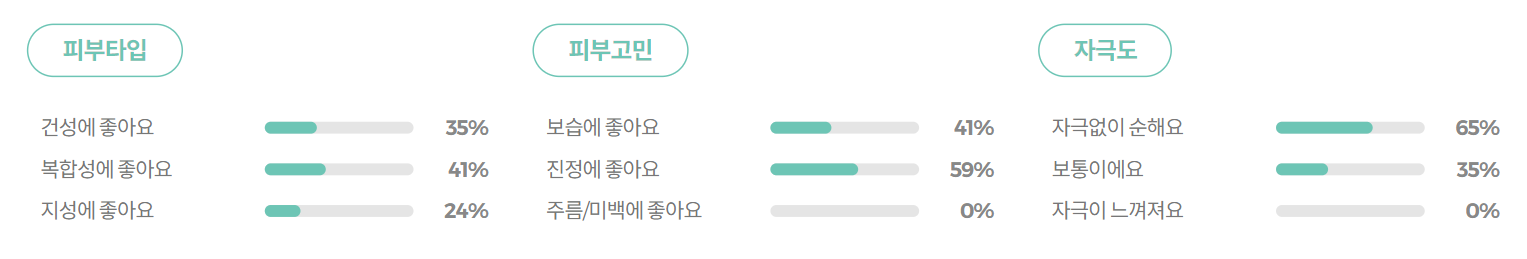

In [ ]:
# 유저의 특성에 기반한 필터링 진행

# Step 1: 파일 로드
file_reviews = 'processed_olive_young_reviews.xlsx'  # 리뷰 데이터 파일 경로
file_products = 'processed_olive_young.xlsx'  # 상품 데이터 파일 경로

df_reviews = pd.read_excel(file_reviews)
df_products = pd.read_excel(file_products)

# Step 2: 유저 특성 정보 정의
user_skin_type_weights = {'건성에 좋아요': 35, '복합성에 좋아요': 41, '지성에 좋아요': 24}
user_skin_concern_weights = {'보습에 좋아요': 41, '진정에 좋아요': 59, '주름/미백에 좋아요': 0}
user_sensitivity_weights = {'자극없이 순해요': 65, '보통이에요': 35, '자극이 느껴져요': 0}

# Step 3: 각 상품의 특성과 유저 특성 간의 점수 계산 함수
def calculate_score(row):
    score = 0
    # 피부 타입 점수
    for skin_type, weight in user_skin_type_weights.items():
        if row.get(f'피부타입_{skin_type}', 0) > 0:
            score += weight

    # 피부 고민 점수
    for concern, weight in user_skin_concern_weights.items():
        if row.get(f'피부고민_{concern}', 0) > 0:
            score += weight

    # 자극도 점수
    for sensitivity, weight in user_sensitivity_weights.items():
        if row.get(f'자극도_{sensitivity}', 0) > 0:
            score += weight

    return score

# Step 4: 상품 데이터에 점수 부여
df_reviews['유저 점수'] = df_reviews.apply(calculate_score, axis=1)

# Step 5: 유저 점수가 0보다 큰 경우만 필터링
filtered_reviews = df_reviews[df_reviews['유저 점수'] > 0]

# Step 6: 필터링된 리뷰의 제품명 추출
filtered_product_names = filtered_reviews['제품명'].unique()

# Step 7: 상품 데이터에서 필터링된 제품명에 해당하는 상품 가져오기
recommended_products = df_products[df_products['제품명'].isin(filtered_product_names)]

# Step 8: 제품명과 리뷰 텍스트 결합
# 리뷰와 제품명을 결합하여 `combined_text` 컬럼 생성
filtered_reviews['combined_text'] = filtered_reviews['제품명'] + ' ' + filtered_reviews['리뷰내용']

# Step 9: 병합된 텍스트와 제품명 등을 추천 데이터프레임에 추가
# 중복되지 않는 제품명에 대한 combined_text을 가져옵니다.
recommended_products = pd.merge(recommended_products, filtered_reviews[['제품명', 'combined_text']], on='제품명', how='left')

# 결과 확인
print("필터링된 추천 제품 목록:")
print(recommended_products.head())

# Step 10: 필요 시 파일로 저장
recommended_products.to_excel('recommended_products.xlsx', index=False)


필터링된 추천 제품 목록:
   Unnamed: 0   브랜드                                                제품명  원래 가격  \
0           1    구달  [구달X먼작귀][리필기획] 구달 청귤 비타C 잡티케어 세럼 50ml 콜라보기획 (5...  43000   
1           1    구달  [구달X먼작귀][리필기획] 구달 청귤 비타C 잡티케어 세럼 50ml 콜라보기획 (5...  43000   
2           2   웰라쥬       [단독/더블기획] 웰라쥬 리얼 히알루로닉 블루 100 앰플 75ml 1+1 기획  46000   
3           3   토리든  [8월 올영픽/단독기획] 토리든 다이브인 저분자 히알루론산 세럼 50ml 리필기획(...  36000   
4           4  넘버즈인       [모공세럼]넘버즈인 3번 보들보들 결 세럼 50ml 리필기획(50ml+50ml)  38000   

   최종 가격   리뷰 수  리뷰 등급  점수 비율_5점  점수 비율_4점  점수 비율_3점  ...  피부타입_건성에 좋아요  \
0  30400  27457      5        83        12         4  ...            29   
1  30400  27457      5        83        12         4  ...            29   
2  29000  17591      5        88         9         2  ...            37   
3  23750  33116      5        88         9         2  ...            37   
4  28500  23036      5        81        12         4  ...            31   

   피부타입_복합성에 좋아요  피부타입_지성에 좋아요  피부고민_보습에 좋아요  피

<ipython-input-19-e669767a78f4>:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_reviews['combined_text'] = filtered_reviews['제품명'] + ' ' + filtered_reviews['리뷰내용']


## 2. Semantic Search

1. 제품별 제품명 + 리뷰 내용을 Sentence Transformer를 활용하여 임베딩 벡터를 계산합니다.

2. 주어진 유저 query에 대해, Sentence Transformer로 임베딩을 한 뒤, 이미 구해진 제품별 임베딩 벡터들간의 코사인 유사도를 계산합니다.

3. 코사인 유사도를 기반으로, 제품별 추천을 구현합니다. 제품별로 코사인 유사도 값이 여러개 나올텐데, 이것을 갖고 어떻게 추천해나갈지는 자유로 두겠습니다.

In [ ]:
# SentenceTransformer 모델 로드
model = SentenceTransformer('all-MiniLM-L6-v2')

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [ ]:
# Semantic Search 진행
from sentence_transformers import SentenceTransformer, util
import torch

# 제품별 임베딩 벡터 계산
product_embeddings = []
for text in tqdm(recommended_products['combined_text'].tolist(), desc="제품 임베딩 계산 중"):
    embedding = model.encode(text, convert_to_tensor=True)
    product_embeddings.append(embedding)

product_embeddings = torch.stack(product_embeddings)

# 유저 쿼리 입력 및 임베딩 계산
user_query = "갑자기 여드름 났을 때 진정시키기 좋은 크림"  # 원하는 쿼리로 변경 가능
user_query_embedding = model.encode(user_query, convert_to_tensor=True)

# 코사인 유사도 계산
cosine_scores = util.pytorch_cos_sim(user_query_embedding, product_embeddings)

# 상위 N개의 제품 추천
top_k = 5  # 상위 5개 추천
top_results = torch.topk(cosine_scores, k=top_k)

# 결과 출력
print("유저 쿼리:", user_query)
print("\n상위 추천 제품 목록:")

for score, idx in zip(top_results[0][0], top_results[1][0]):
    idx = int(idx)
    print(f"제품명: {recommended_products.iloc[idx]['제품명']} (유사도: {score.item():.4f})")

# 필요 시 결과를 파일로 저장
recommended_products.iloc[top_results[1][0]].to_excel('final_recommended_products.xlsx', index=False)


제품 임베딩 계산 중: 100%|██████████| 111/111 [00:19<00:00,  5.83it/s]


유저 쿼리: 갑자기 여드름 났을 때 진정시키기 좋은 크림

상위 추천 제품 목록:
제품명: [트러블촉이올때] 브링그린 징크테카 트러블 세럼 한정기획 (유사도: 0.7177)
제품명: [NEW] 바이오힐보 판테셀 리페어시카 크림미스트 120mL(기획/단품) (유사도: 0.7025)
제품명: [8월 올영픽/리필증정] 프리메라 알파인 베리 워터리 크림 기획/단품 (유사도: 0.6854)
제품명: [3D볼륨탄력크림] 바이오힐보 프로바이오덤 3D 리프팅크림 50ml 리필기획 (유사도: 0.6825)
제품명: 이니스프리 레티놀 시카 흔적 앰플 30mL 기획 (유사도: 0.6619)
